In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotx
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 2


In [2]:
df311main = pd.read_csv("311 2010-Present.csv")
dfs311extraLIST = [pd.read_csv("311 2004.csv"), pd.read_csv("311 2005.csv"), pd.read_csv("311 2006.csv"), pd.read_csv("311 2007.csv"), pd.read_csv("311 2008.csv"), pd.read_csv("311 2009.csv")]



/var/folders/lj/rkr5tck17gdblbjj5k5l3skc0000gn/T/ipykernel_75902/3736389811.py:1: DtypeWarning: Columns (17,18,20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df311main = pd.read_csv("311 2010-Present.csv")
/var/folders/lj/rkr5tck17gdblbjj5k5l3skc0000gn/T/ipykernel_75902/3736389811.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs311extraLIST = [pd.read_csv("311 2004.csv"), pd.read_csv("311 2005.csv"), pd.read_csv("311 2006.csv"), pd.read_csv("311 2007.csv"), pd.read_csv("311 2008.csv"), pd.read_csv("311 2009.csv")]
/var/folders/lj/rkr5tck17gdblbjj5k5l3skc0000gn/T/ipykernel_75902/3736389811.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs311extraLIST = [pd.read_csv("311 2004.csv"), pd.read_csv("311 2005.csv"), pd.read_csv("311 2006.csv"), pd.read_csv("311 2007.csv"), pd.read_csv("311 2008.csv"), pd.read_csv("311 2009.csv")]


In [3]:
dfs311extra = pd.concat(dfs311extraLIST, join="inner")
df311 = pd.concat([df311main, dfs311extra], join="outer")
print(df311)



        Unique Key            Created Date             Closed Date Agency  \
0         60655090  03/23/2024 01:36:06 AM                     NaN   NYPD   
1         60655111  03/23/2024 01:35:14 AM                     NaN   NYPD   
2         60655096  03/23/2024 01:35:08 AM                     NaN   NYPD   
3         60656253  03/23/2024 01:34:41 AM                     NaN   NYPD   
4         60663438  03/23/2024 01:33:56 AM                     NaN   NYPD   
...            ...                     ...                     ...    ...   
111716    14278898  06/28/2009 12:00:00 AM  06/28/2009 12:00:00 AM   NYPD   
111717    13918480  05/10/2009 12:00:00 AM  05/10/2009 12:00:00 AM   NYPD   
111718    14801043  09/06/2009 12:00:00 AM  09/06/2009 12:00:00 AM   NYPD   
111719    13075091  02/02/2009 12:00:00 AM  02/03/2009 12:00:00 AM   NYPD   
111720    15148190  10/25/2009 12:00:00 AM  10/25/2009 12:00:00 AM   NYPD   

                            Agency Name           Complaint Type  \
0      

In [4]:
summons = pd.concat([pd.read_csv('Summons.csv'), pd.read_csv("Summons2023.csv")], join = "outer")

In [5]:
# Data Cleaning
summons['SUMMONS_DATE'] = pd.to_datetime(summons['SUMMONS_DATE'])
summons['Year'] = summons['SUMMONS_DATE'].dt.year
summons['Month'] = summons['SUMMONS_DATE'].dt.month


df311['Created Date'] = pd.to_datetime(df311['Created Date'])
df311['Closed Date'] = pd.to_datetime(df311['Closed Date'])
df311['Response Time'] = pd.to_timedelta((df311["Closed Date"] - df311["Created Date"]))
df311['Year'] = df311['Created Date'].dt.year
df311['Month'] = df311['Created Date'].dt.month
df311mainclean = df311[(df311['Response Time'] > pd.Timedelta(0)) & (df311['Response Time'] < pd.Timedelta("4 days"))]
dftemp = df311mainclean.sort_values(by='Response Time', ascending=False)

print(dftemp['Response Time'])
print(dftemp['Descriptor'])



6117793   3 days 23:59:46
5684416   3 days 23:59:00
6066168   3 days 23:59:00
1521013   3 days 23:59:00
4306118   3 days 23:59:00
                ...      
3077774   0 days 00:00:01
3019936   0 days 00:00:01
3104498   0 days 00:00:01
3104495   0 days 00:00:01
3062788   0 days 00:00:01
Name: Response Time, Length: 6198445, dtype: timedelta64[ns]
6117793                                Loud Music/Party
5684416    Noise: Construction Before/After Hours (NM1)
6066168    Noise: Construction Before/After Hours (NM1)
1521013             Noise: Construction Equipment (NC1)
4306118             Noise: Construction Equipment (NC1)
                               ...                     
3077774                                           Other
3019936                                           Other
3104498                                           Other
3104495                                           Other
3062788                                           Other
Name: Descriptor, Length: 6198445, dt

In [118]:
gentrifying_colors = ["orange", "red", "orangered", "lightcoral", "lightsalmon", "coral"]
non_gentrifying_colors = ["royalblue", "navy", "mediumslateblue", "blueviolet", "cornflowerblue"]

2006: 19212
2007: 20365
2008: 19861
2009: 24213
2010: 23719
2011: 20055
2012: 21007
2013: 19142
2014: 14813
2015: 8548
2016: 6379
2017: 3744
2018: 1402
2019: 999
2020: 701
2021: 936
2022: 2244
2023: 3659


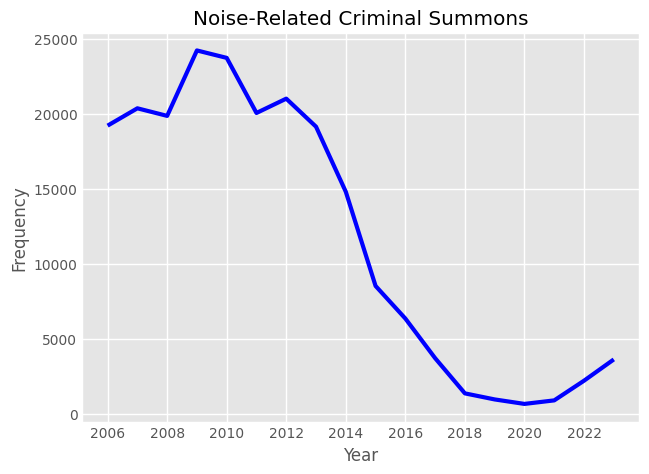

In [82]:
# Summons Quantities
dicSummons = {}
for i in range(2006, 2024):
    # mask = (summons['SUMMONS_DATE'] > str(i) + '-1-1') & (summons['SUMMONS_DATE'] <= str(i+1) + '-1-1')
    mask = summons['Year'] == i
    dicSummons[i] = len(summons.loc[mask])
    print(str(i) + ": " + str(len(summons.loc[mask])))


summonsNew = sorted(dicSummons.items())
x,y = zip(*(summonsNew))
plt.xticks(range(2006,2024, 2))

plt.plot(x, y, color = "blue")
plt.title("Noise-Related Criminal Summons")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()




In [131]:
crown = {"08 BROOKLYN", "09 BROOKLYN"}
chinatown = {"03 MANHATTAN"}
bushwick = {"04 BROOKLYN"}
harlem = {"10 MANHATTAN", "11 MANHATTAN", "09 MANHATTAN"}
soho = {"02 MANHATTAN"}

# Non-Gentrified
upper_east = {'08 MANHATTAN'}
flushing = {"07 QUEENS"}
woodside = {"02 QUEENS"}



years = range(2006,2024)

crown_precincts = {77, 71}
chinatown_precincts= {5}
bushwick_precincts = {83}
harlem_precincts = {28, 32}
soho_precincts = {1, 5}


gentrified_regions_precincts = [["Crown Heights", crown_precincts, crown], ["Chinatown", chinatown_precincts, chinatown], ["SoHo", soho_precincts, soho], ["Bushwick", bushwick_precincts, bushwick], ["Harlem", harlem_precincts, harlem]]

# Non-Gentrified
upper_east_precincts = {19}
flushing_precincts = {109}
woodside_precincts = {108}
non_gentrified_regions_precincts = [["Upper East Side", upper_east_precincts, upper_east], ["Flushing", flushing_precincts, flushing], ["Woodside", woodside_precincts, woodside]]

In [84]:
# Summons by Precint
def SummonsPrecinct(precinct, place, boolean):
    dic = {}
    for i in years:
        # maskYear = (summons['SUMMONS_DATE'] > str(i) + '-1-1') & (summons['SUMMONS_DATE'] <= str(i+1) + '-1-1')
        maskYear = summons['Year'] == i
        maskPrecinct = ((summons["PRECINCT_OF_OCCUR"]).isin(precinct))
        dic[i] = len(summons.loc[maskYear & maskPrecinct])
        if (boolean):
            print(str(i) + ": " + str(len(summons.loc[maskYear & maskPrecinct])))
    
    lnew = sorted(dic.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    
    if (boolean):
        plt.plot(x, y)
        plt.title(place)
        plt.show()
    return dic

Crown Heights (870, 1106, 639, 879, 1047, 600, 572, 409, 307, 201, 116, 72, 30, 23, 22, 18, 19, 38)
Chinatown (15, 12, 34, 39, 8, 14, 29, 57, 44, 25, 31, 12, 4, 2, 1, 1, 3, 2)
SoHo (29, 27, 51, 51, 20, 35, 80, 76, 60, 34, 35, 13, 5, 5, 1, 2, 3, 2)
Bushwick (593, 802, 798, 505, 381, 359, 237, 293, 196, 115, 43, 19, 8, 12, 6, 12, 18, 4)
Harlem (283, 404, 308, 439, 236, 493, 552, 250, 185, 132, 125, 48, 25, 10, 7, 3, 19, 28)
Upper East Side (23, 31, 29, 88, 105, 111, 47, 26, 13, 10, 4, 0, 0, 0, 3, 1, 8, 1)
Flushing (189, 126, 93, 115, 100, 48, 48, 65, 38, 13, 8, 14, 3, 8, 2, 5, 8, 24)
Woodside (245, 240, 125, 110, 124, 89, 61, 84, 59, 14, 11, 11, 1, 2, 7, 16, 37, 19)


Text(0, -0.05, '*Same graph color-coded for neighborhood identification purposes')

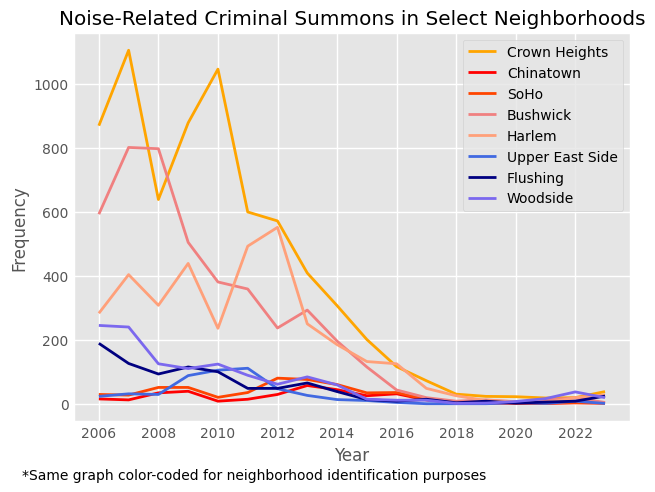

In [145]:
# PLOT SUMMONS MULTIPLE NEIGHBORHOODS
from labellines import labelLines

pop = pd.read_csv("NYC Population.csv")

j = 0
# gentrifying neighborhoods
for neighborhood in gentrified_regions_precincts:
    temp = SummonsPrecinct(neighborhood[1], neighborhood[0], False)
    total = 0
    # for cb in neighborhood[2]:
    #     total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    # for i in temp.keys():
    #     temp[i] = temp[i]/total


    lnew = sorted(temp.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    plt.plot(x, y, label = neighborhood[0], color = gentrifying_colors[j])
    # plt.plot(x, y, label = neighborhood[0], color = 'red')

    j+=1
    print(neighborhood[0], y)

j = 0
# gentrifying neighborhoods
for neighborhood in non_gentrified_regions_precincts:
    temp = SummonsPrecinct(neighborhood[1], neighborhood[0], False)
    total = 0
    # for cb in neighborhood[2]:
    #     total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    # for i in temp.keys():
    #     temp[i] = temp[i]/total


    lnew = sorted(temp.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    plt.plot(x, y, label = neighborhood[0], color = non_gentrifying_colors[j])
    # plt.plot(x, y, label = neighborhood[0], color = 'blue')

    j+=1
    print(neighborhood[0], y)

leg = plt.legend(loc='upper right')
plt.title("Noise-Related Criminal Summons in Select Neighborhoods")
plt.ylabel("Frequency")
plt.xlabel('Year')
plt.figtext(0,-.05, "*Same graph color-coded for neighborhood identification purposes", wrap=True, horizontalalignment='left', fontsize=10)
# matplotx.line_labels()
# labelLines(plt.gca().get_lines(), xvals = x)

Text(0.5, 0, 'Year')

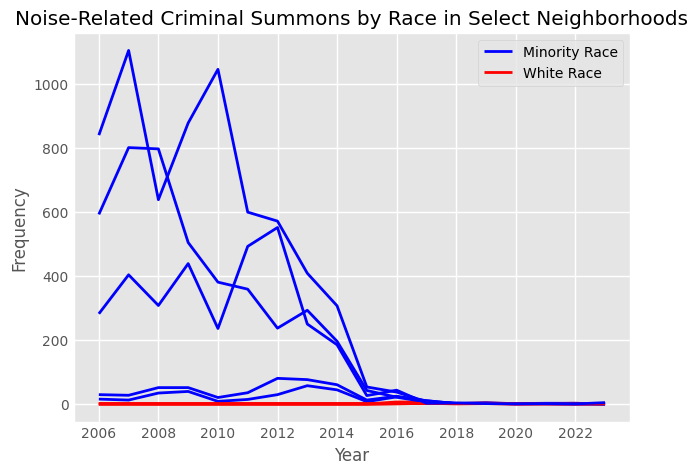

In [139]:
# PLOT 311 MULTIPLE NEIGHBORHOODS

# Summons by Precint
def SummonsPrecinctRace(precinct, place):
    dicWhite = {}
    dicMinority = {}
    for i in years:
        maskYear = summons['Year'] == i
        maskPrecinct = ((summons["PRECINCT_OF_OCCUR"]).isin(precinct))
        maskWhite = summons["RACE"] == "WHITE"
        maskMinority = (summons["RACE"].isin(["WHITE", "UNKNOWN"]))
        dicWhite[i] = len(summons.loc[maskYear & maskPrecinct & maskWhite])
        dicMinority[i] = len(summons.loc[maskYear & maskPrecinct & maskMinority])

        # if (boolean):
        #     print(str(i) + ": " + str(len(summons.loc[maskYear & maskPrecinct])))
    
    return dicWhite, dicMinority


for neighborhood in gentrified_regions_precincts:
    tempWhite, tempMinority = SummonsPrecinctRace(neighborhood[1], neighborhood[0])
    total = 0
    # for cb in neighborhood[2]:
    #     total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    # for i in temp.keys():
    #     temp[i] = temp[i]/total


    lnewWhite = sorted(tempWhite.items())
    lnewMinority = sorted(tempMinority.items())

    xwhite,ywhite = zip(*(lnewWhite))
    xminority,yminority = zip(*(lnewMinority))

    plt.xticks(range(2006,2024, 2))
    # plt.plot(xwhite, ywhite, label = neighborhood[0] + " White", color = 'Red')
    # plt.plot(xminority, yminority, label = neighborhood[0] + " Minority", color = 'Blue')
    plt.plot(xwhite, ywhite, color = 'Red')
    plt.plot(xminority, yminority, color = 'Blue')

plt.plot(2021,0, color="Blue", label = "Minority Race")
plt.plot(2021,0, color="Red", label = "White Race")

leg = plt.legend(loc='upper right')
plt.title("Noise-Related Criminal Summons by Race in Select Neighborhoods")
plt.ylabel("Frequency")
plt.xlabel('Year')
# plt.figtext(0,-.05, "*Gentrifying Neighborhoods in Red, Non-Gentrifying Neighborhoods in Blue", wrap=True, horizontalalignment='left', fontsize=10)# matplotx.line_labels()

Text(0.5, 0, 'Year')

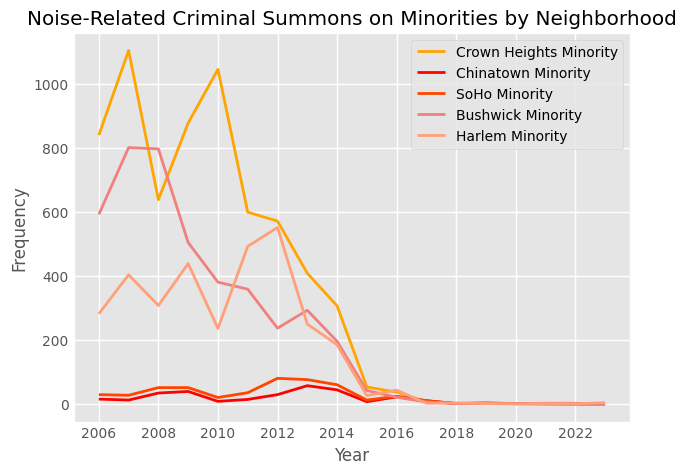

In [137]:
j = 0
for neighborhood in gentrified_regions_precincts:
    tempWhite, tempMinority = SummonsPrecinctRace(neighborhood[1], neighborhood[0])
    total = 0
    # for cb in neighborhood[2]:
    #     total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    # for i in temp.keys():
    #     temp[i] = temp[i]/total


    lnewWhite = sorted(tempWhite.items())
    lnewMinority = sorted(tempMinority.items())

    xwhite,ywhite = zip(*(lnewWhite))
    xminority,yminority = zip(*(lnewMinority))

    plt.xticks(range(2006,2024, 2))
    plt.plot(xminority, yminority, label = neighborhood[0] + " Minority", color = gentrifying_colors[j])
    j+=1

leg = plt.legend(loc='upper right')
plt.title("Noise-Related Criminal Summons on Minorities by Neighborhood")
plt.ylabel("Frequency")
plt.xlabel('Year')
# plt.figtext(0,-.05, "*Gentrifying Neighborhoods in Red, Non-Gentrifying Neighborhoods in Blue", wrap=True, horizontalalignment='left', fontsize=10)# matplotx.line_labels()

In [56]:
# GET COUNTS

def getSummonCountRace(precinct):
    yearsSummons = range(2006, 2016)
    countWhite = 0
    countMinority = 0
    for i in yearsSummons:
        maskYear = summons['Year'] == i
        maskPrecinct = ((summons["PRECINCT_OF_OCCUR"]).isin(precinct))
        maskWhite = summons["RACE"] == "WHITE"
        maskMinority = (summons["RACE"].isin(["WHITE", "UNKNOWN"]))
        countWhite += len(summons.loc[maskYear & maskPrecinct & maskWhite])
        countMinority += len(summons.loc[maskYear & maskPrecinct & maskMinority])
    return countWhite, countMinority

whiteSummons = 0
minoritySummons = 0
for neighborhood in gentrified_regions_precincts:
    whiteSummonsYear, minoritySummonsYear = getSummonCountRace(neighborhood[1])
    whiteSummons += whiteSummonsYear
    minoritySummons += minoritySummonsYear

print(whiteSummons, minoritySummons)


    

0 14534


In [38]:
print(summons["RACE"].value_counts())

RACE
UNKNOWN                           187043
BLACK                               5655
WHITE HISPANIC                      4429
BLACK HISPANIC                      2360
ASIAN / PACIFIC ISLANDER            1859
WHITE                               1293
AMERICAN INDIAN/ALASKAN NATIVE       127
HISPANIC                              30
OTHER                                 30
(null)                                 2
Name: count, dtype: int64


In [13]:
years = range(2006,2024)

# Gentrification
#crown = {77, 71}
#chinatown = {5}
#bushwick = {53}
crown = {"08 BROOKLYN", "09 BROOKLYN"}
chinatown = {"03 MANHATTAN"}
bushwick = {"04 BROOKLYN"}
harlem = {"10 MANHATTAN", "11 MANHATTAN", "09 MANHATTAN"}
soho = {"02 MANHATTAN"}


gentrified_regions = [["Crown Heights", crown], ["Chinatown", chinatown], ["SoHo", soho], ["Bushwick", bushwick], ["Harlem", harlem]]

# Non-Gentrified
upper_east = {'08 MANHATTAN'}
jackson = {"03 QUEENS"}
flushing = {"07 QUEENS"}
woodside = {"02 QUEENS"}
non_gentrified_regions = [["Upper East Side", upper_east], ["Jackson", jackson], ["Flushing", flushing], ["Woodside", woodside]]

In [17]:
# 311 Quantities
def Quantities311(precinct, place, boolean):
    dic = {}
    for i in years:
        # maskYear = (df311['Created Date'] > str(i) + '-1-1') & (df311['Created Date'] <= str(i+1) + '-1-1')
        maskYear = df311['Year'] == i

        maskPrecinct = ((df311["Police Precincts"]).isin(precinct))
        dic[i] = len(df311.loc[maskYear & maskPrecinct])
        if (boolean):
            print(str(i) + ": " + str(len(df311.loc[maskYear & maskPrecinct])))
    
    lnew = sorted(dic.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    
    if (boolean):
        plt.plot(x, y)
        plt.title(place)
        plt.show()
    return dic

# 311 Quantities
def Quantities311CB(board, place, boolean):
    dic = {}
    for i in years:
        # maskYear = (df311['Created Date'] > str(i) + '-1-1') & (df311['Created Date'] <= str(i+1) + '-1-1')
        maskYear = df311['Year'] == i

        maskCB = ((df311["Community Board"]).isin(board))
        dic[i] = len(df311.loc[maskYear & maskCB])
        if (boolean):
            print(str(i) + ": " + str(len(df311.loc[maskYear & maskCB])))
    
    lnew = sorted(dic.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))

    if (boolean):
        plt.plot(x, y)
        plt.title(place)
        plt.show()
    return dic
        

2006: 3567
2007: 3266
2008: 3440
2009: 2737
2010: 6447
2011: 7166
2012: 8469
2013: 9856
2014: 12418
2015: 15203
2016: 15291
2017: 17090
2018: 17200
2019: 18009
2020: 24268
2021: 21145
2022: 19425
2023: 23729


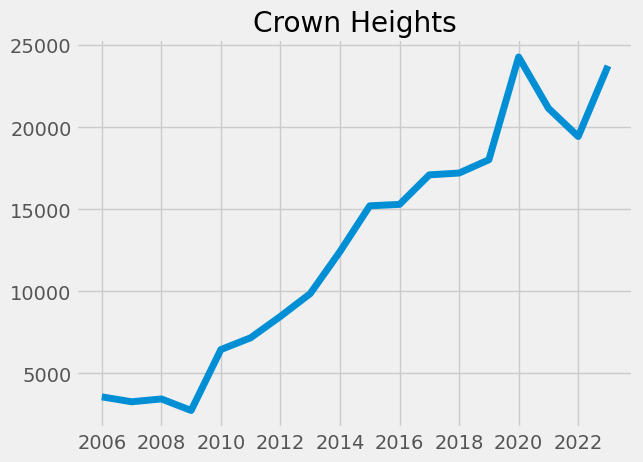

{2006: 3567,
 2007: 3266,
 2008: 3440,
 2009: 2737,
 2010: 6447,
 2011: 7166,
 2012: 8469,
 2013: 9856,
 2014: 12418,
 2015: 15203,
 2016: 15291,
 2017: 17090,
 2018: 17200,
 2019: 18009,
 2020: 24268,
 2021: 21145,
 2022: 19425,
 2023: 23729}

In [73]:
Quantities311CB(crown, "Crown Heights", True)


2006: 8714
2007: 7706
2008: 6781
2009: 5776
2010: 7041
2011: 6709
2012: 8720
2013: 10169
2014: 11767
2015: 13982
2016: 15818
2017: 16276
2018: 14008
2019: 14656
2020: 20386
2021: 24249
2022: 21192
2023: 19038


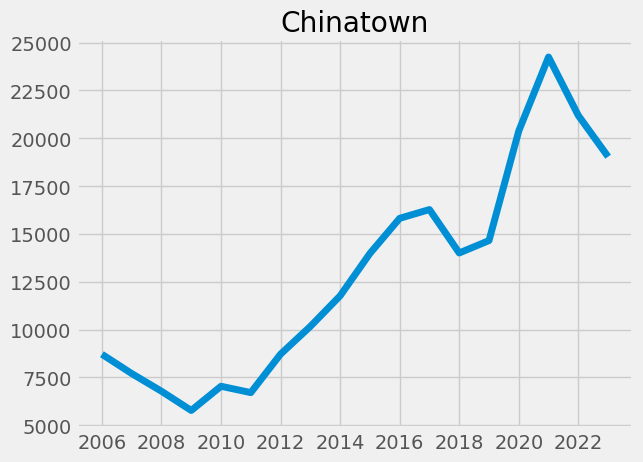

{2006: 8714,
 2007: 7706,
 2008: 6781,
 2009: 5776,
 2010: 7041,
 2011: 6709,
 2012: 8720,
 2013: 10169,
 2014: 11767,
 2015: 13982,
 2016: 15818,
 2017: 16276,
 2018: 14008,
 2019: 14656,
 2020: 20386,
 2021: 24249,
 2022: 21192,
 2023: 19038}

In [74]:
Quantities311CB(chinatown, "Chinatown", True)    


2006: 1836
2007: 1968
2008: 1852
2009: 1566
2010: 3186
2011: 3245
2012: 4044
2013: 5172
2014: 7970
2015: 8981
2016: 10784
2017: 12120
2018: 10979
2019: 14175
2020: 18121
2021: 15975
2022: 14459
2023: 15131


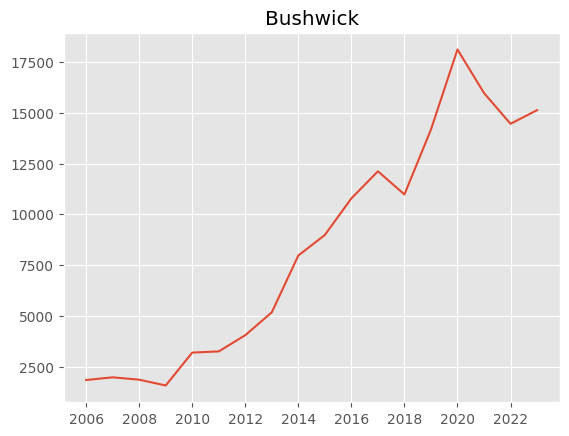

{2006: 1836,
 2007: 1968,
 2008: 1852,
 2009: 1566,
 2010: 3186,
 2011: 3245,
 2012: 4044,
 2013: 5172,
 2014: 7970,
 2015: 8981,
 2016: 10784,
 2017: 12120,
 2018: 10979,
 2019: 14175,
 2020: 18121,
 2021: 15975,
 2022: 14459,
 2023: 15131}

In [20]:
Quantities311CB(bushwick, "Bushwick", True)    



2006: 10035
2007: 10554
2008: 9067
2009: 8113
2010: 15309
2011: 15293
2012: 17252
2013: 20656
2014: 25532
2015: 31120
2016: 33460
2017: 34827
2018: 34875
2019: 36335
2020: 60504
2021: 55987
2022: 49477
2023: 49894


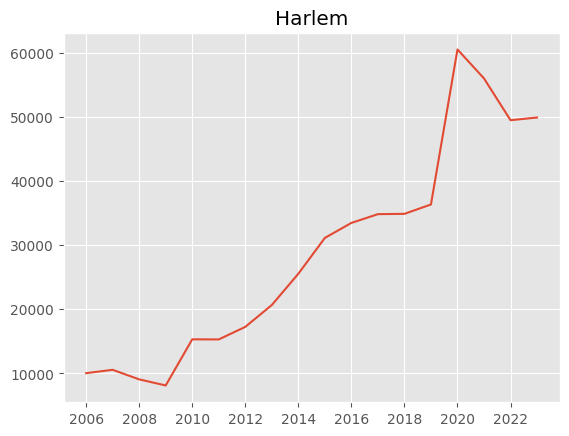

{2006: 10035,
 2007: 10554,
 2008: 9067,
 2009: 8113,
 2010: 15309,
 2011: 15293,
 2012: 17252,
 2013: 20656,
 2014: 25532,
 2015: 31120,
 2016: 33460,
 2017: 34827,
 2018: 34875,
 2019: 36335,
 2020: 60504,
 2021: 55987,
 2022: 49477,
 2023: 49894}

In [21]:
Quantities311CB(harlem, "Harlem", True)

2006: 4928
2007: 5416
2008: 5068
2009: 4005
2010: 4768
2011: 5443
2012: 4779
2013: 5362
2014: 7261
2015: 9690
2016: 8918
2017: 8475
2018: 7363
2019: 7375
2020: 7909
2021: 10056
2022: 9798
2023: 12167


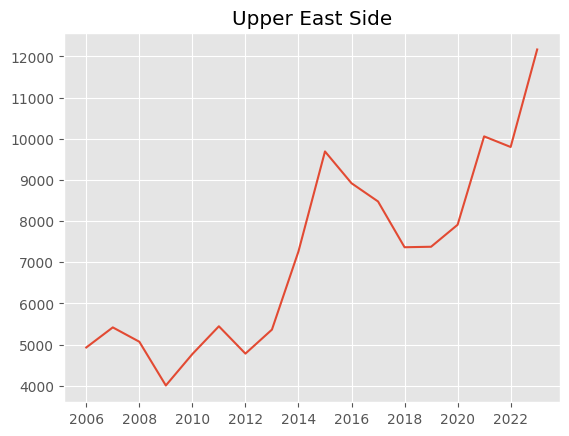

{2006: 4928,
 2007: 5416,
 2008: 5068,
 2009: 4005,
 2010: 4768,
 2011: 5443,
 2012: 4779,
 2013: 5362,
 2014: 7261,
 2015: 9690,
 2016: 8918,
 2017: 8475,
 2018: 7363,
 2019: 7375,
 2020: 7909,
 2021: 10056,
 2022: 9798,
 2023: 12167}

In [22]:
Quantities311CB(upper_east, "Upper East Side", True)

In [23]:
# 311 Enforcements
maskYear = (df311['Created Date'] > '2010-1-1') & (df311['Created Date'] <= '2011-1-1')
maskCB = ((df311["Community Board"].isin(crown)))
print(df311.loc[maskCB & maskYear, "Resolution Description"].value_counts())

Resolution Description
The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                   2263
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                    1921
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                                                                                                                                              

In [24]:
print("Number of 311 Reports: " + str(len(dftemp)))
responseTimes = dftemp.groupby("Descriptor")["Response Time"].mean()
numResponses = dftemp["Descriptor"].value_counts()
responsedf = pd.merge(responseTimes, numResponses, on="Descriptor")
print(responsedf)

Number of 311 Reports: 6198445
                                                               Response Time  \
Descriptor                                                                     
21 Collection Truck Noise                          1 days 08:04:06.357758620   
Banging/Pounding                                   0 days 02:53:29.917259857   
Car/Truck Horn                                     0 days 02:12:20.057458278   
Car/Truck Music                                    0 days 03:14:01.963934544   
Engine Idling                                      0 days 02:23:13.134451487   
Flying Too Low                                     0 days 00:03:07.148275862   
Horn Honking Sign Requested (NR9)                  2 days 03:02:08.217636022   
Hovering                                           0 days 00:03:05.702898550   
Loud Music                                         1 days 00:37:16.035815037   
Loud Music/Party                                   0 days 03:03:53.683461475   
Loud Talk

In [25]:
print(summons["RACE"].value_counts())


RACE
UNKNOWN                           187043
BLACK                               5655
WHITE HISPANIC                      4429
BLACK HISPANIC                      2360
ASIAN / PACIFIC ISLANDER            1859
WHITE                               1293
AMERICAN INDIAN/ALASKAN NATIVE       127
HISPANIC                              30
OTHER                                 30
(null)                                 2
Name: count, dtype: int64


In [26]:
print(summons["LAW_SECTION_NUMBER"].value_counts()[summons["LAW_SECTION_NUMBER"].value_counts(dropna=False) > 5])

LAW_SECTION_NUMBER
240.20-2      67828
24-218        55201
24-227        45606
20-218        20198
24-220         9329
24-221         4225
24-236(A)      2887
240.20(2)      2691
24-218(A)       557
24-237(A)       218
24218           122
24-222          118
24227           112
24-220(A)        64
9999             60
24-236(B)        60
1-05(D)(2)       41
24               27
1-05(D)(1)       26
24.218           17
24-235(A)        16
24 218           12
24220            10
24221             9
240.202           6
105D              6
Name: count, dtype: int64


In [27]:
print(summons["OFFENSE_DESCRIPTION"].value_counts()[summons["OFFENSE_DESCRIPTION"].value_counts(dropna=False) > 5])

OFFENSE_DESCRIPTION
NOISE (UNREASONABLE)                                                           70448
DISCON: UNREASONABLE NOISE                                                     68530
NOISE (ENGINE EXHAUST)                                                         39835
NOISE (DEVICE)                                                                  9358
UNREASONABLE NOISE                                                              4699
NOISE (HORN/ALARM)                                                              4234
NOISE (ENGIN EXHUST)                                                            4229
UNREASONABLE NOISE; FROM CAR MUFFLER/EXHAUST (HEARD FROM 150 FT AWAY)           3034
MAKES UNREASONABLE NOISE                                                        2953
NOISE (ENGINE EXHUST)                                                           1628
UNREASONABLE NOISE; GENERAL                                                      601
UNREASONABLE NOISE; FROM ANY VEHICLE HORN    

Crown Heights
Chinatown
SoHo
Bushwick
Harlem
Upper East Side
Jackson
Flushing
Woodside


Text(0, -0.05, '*Gentrifying Neighborhoods in Red tones, Non-Gentrifying Neighborhoods in Blue tones')

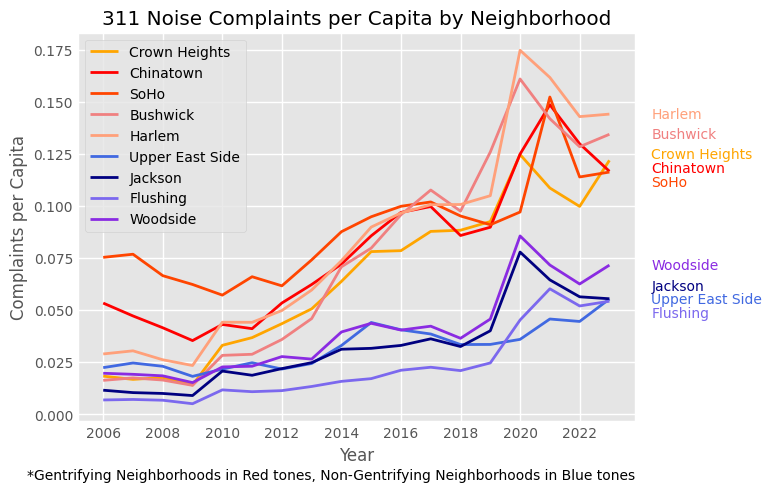

In [133]:
# PLOT 311 MULTIPLE NEIGHBORHOODS

pop = pd.read_csv("NYC Population.csv")
j = 0
# gentrifying neighborhoods
for neighborhood in gentrified_regions:
    temp = Quantities311CB(neighborhood[1], neighborhood[0], False)
    total = 0
    for cb in neighborhood[1]:
        total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    for i in temp.keys():
        temp[i] = temp[i]/total


    lnew = sorted(temp.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    plt.plot(x, y, label = neighborhood[0], color = gentrifying_colors[j])
    j+=1
    print(neighborhood[0])

j = 0
# gentrifying neighborhoods
for neighborhood in non_gentrified_regions:
    temp = Quantities311CB(neighborhood[1], neighborhood[0], False)
    total = 0
    for cb in neighborhood[1]:
        total += int(pop.loc[pop["Community Board"] == cb, "2010 Population"].iloc[0])
    for i in temp.keys():
        temp[i] = temp[i]/total


    lnew = sorted(temp.items())
    x,y = zip(*(lnew))
    plt.xticks(range(2006,2024, 2))
    plt.plot(x, y, label = neighborhood[0], color = non_gentrifying_colors[j])
    j+=1
    print(neighborhood[0])

# leg = plt.legend(loc='upper center')
matplotx.line_labels()
leg = plt.legend(loc='upper left')
plt.title("311 Noise Complaints per Capita by Neighborhood")
plt.ylabel("Complaints per Capita")
plt.xlabel('Year')
plt.figtext(0,-.05, "*Gentrifying Neighborhoods in Red tones, Non-Gentrifying Neighborhoods in Blue tones", wrap=True, horizontalalignment='left', fontsize=10)

    
